In [9]:
N = ord("M") % 5 + 1

print(N)

5


In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('NationalNames.csv')

# Output the first 8 rows
print(df.head(8))

   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414


In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv('NationalNames.csv')

# Get the column names
print(df.columns)

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('NationalNames.csv')

# Filter for unique female names
unique_female_names = df[df['Gender'] == 'F']['Name'].nunique()

# Filter for unique male names
unique_male_names = df[df['Gender'] == 'M']['Name'].nunique()

# Print the results
print(f"Number of unique female names: {unique_female_names}")
print(f"Number of unique male names: {unique_male_names}")

Number of unique female names: 64911
Number of unique male names: 39199


In [12]:
import pandas as pd

# Load the dataset
df = pd.read_csv('NationalNames.csv')

# Filter the dataset for male names in 2010
male_names_2010 = df[(df['Year'] == 2010) & (df['Gender'] == 'M')]

# Group by 'Name' and sum the 'Count' to find the most popular names
most_popular_male_names_2010 = male_names_2010.groupby('Name')['Count'].sum().nlargest(5)

# Print the results
print(most_popular_male_names_2010)

Name
Jacob      22082
Ethan      17985
Michael    17308
Jayden     17152
William    17030
Name: Count, dtype: int64


In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv('NationalNames.csv')

# Specify the year you're interested in (you can change this year)
year = 2010

# Filter the dataset for the specified year
names_in_year = df[df['Year'] == year]

# Find the name with the maximum 'Count'
most_popular_name = names_in_year.loc[names_in_year['Count'].idxmax()]

# Print the result
print(f"The most popular name in {year} is {most_popular_name['Name']} with {most_popular_name['Count']} occurrences.")

The most popular name in 2010 is Isabella with 22883 occurrences.


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('NationalNames.csv')

# Filter the dataset for the name "Jacob" and female gender
jacob_female = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')]

# Check if there are any results for "Jacob" as a female name
if not jacob_female.empty:
    # Find the year when "Jacob" was the most popular as a female name
    most_popular_year = jacob_female.loc[jacob_female['Count'].idxmax()]
    print(f"The year when 'Jacob' was most popular as a female name is {most_popular_year['Year']} with {most_popular_year['Count']} occurrences.")
else:
    print("There are no records of 'Jacob' being used as a female name.")

The year when 'Jacob' was most popular as a female name is 2004 with 171 occurrences.


In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('NationalNames.csv')

# Keep only names that appear in both genders
# First, create a smaller DataFrame by focusing on the relevant columns
df_small = df[['Year', 'Name', 'Gender']]

# Create a pivot table with 'Name' and 'Year', where each row will show the count of male and female occurrences
pivot_df = df_small.pivot_table(index=['Year', 'Name'], columns='Gender', aggfunc='size', fill_value=0)

# Filter the names that appear in both genders (both Male and Female counts > 0)
gender_neutral_names = pivot_df[(pivot_df['F'] > 0) & (pivot_df['M'] > 0)]

# Count the number of gender-neutral names per year
gender_neutral_count = gender_neutral_names.reset_index().groupby('Year')['Name'].nunique()

# Find the year with the most gender-neutral names
most_gender_neutral_year = gender_neutral_count.idxmax()
most_gender_neutral_count = gender_neutral_count.max()

# Print the result
print(f"The year with the most gender-neutral names is {most_gender_neutral_year} with {most_gender_neutral_count} gender-neutral names.")

The year with the most gender-neutral names is 2008 with 2557 gender-neutral names.


In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv('NationalNames.csv')

# Calculate the total births per year
total_births_per_year = df.groupby('Year')['Count'].sum().reset_index()

# Print the result
print(total_births_per_year)

     Year    Count
0    1880   201484
1    1881   192699
2    1882   221538
3    1883   216950
4    1884   243467
..    ...      ...
130  2010  3686589
131  2011  3646730
132  2012  3643336
133  2013  3626802
134  2014  3670151

[135 rows x 2 columns]


In [19]:
import pandas as pd

# Load the dataset
df = pd.read_csv('NationalNames.csv')

# Calculate total births per year
total_births_per_year = df.groupby('Year')['Count'].sum()

# Find the year with the greatest number of children born
max_births_year = total_births_per_year.idxmax()
max_births_count = total_births_per_year.max()

# Print the result
print(f"The year with the greatest number of children born is {max_births_year} with {max_births_count} births.")

The year with the greatest number of children born is 1957 with 4200026 births.


In [21]:
import pandas as pd

# Load the dataset
df = pd.read_csv('NationalNames.csv')

# Group by 'Year' and 'Gender' and sum the 'Count'
births_per_year_gender = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()

# Print the result
print(births_per_year_gender)

Gender        F        M
Year                    
1880      90993   110491
1881      91954   100745
1882     107850   113688
1883     112321   104629
1884     129022   114445
...         ...      ...
2010    1772738  1913851
2011    1753500  1893230
2012    1753922  1889414
2013    1745339  1881463
2014    1768775  1901376

[135 rows x 2 columns]


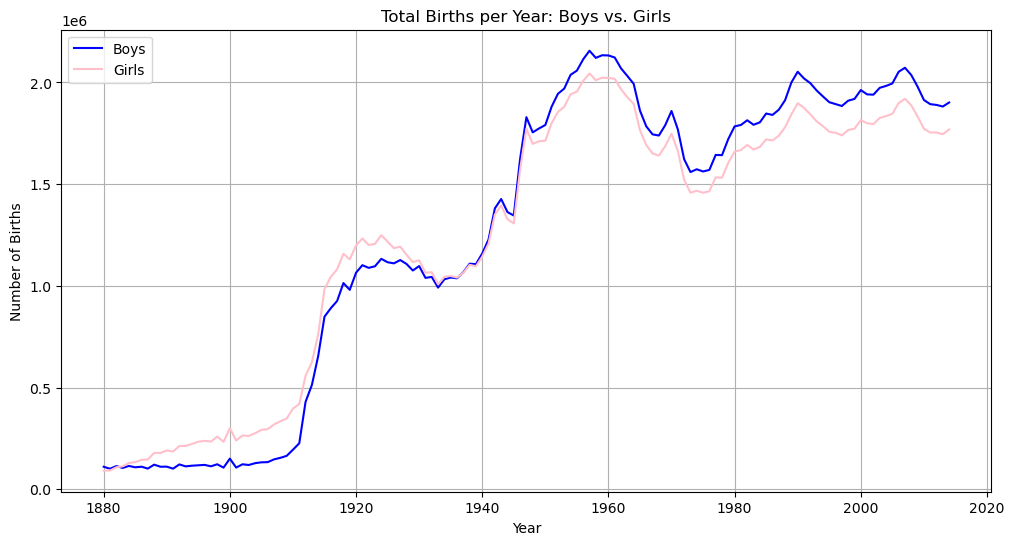

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('NationalNames.csv')

# Group by 'Year' and 'Gender', then sum the 'Count'
births_per_year_gender = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(births_per_year_gender.index, births_per_year_gender['M'], label='Boys', color='blue')
plt.plot(births_per_year_gender.index, births_per_year_gender['F'], label='Girls', color='pink')

# Adding labels and title
plt.title('Total Births per Year: Boys vs. Girls')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [25]:
import pandas as pd

# Load the dataset
df = pd.read_csv('NationalNames.csv')

# Group by 'Name' and count unique genders
gender_counts = df.groupby('Name')['Gender'].nunique()

# Filter names that appear in both genders
gender_neutral_names = gender_counts[gender_counts == 2].index

# Count the number of gender-neutral names
num_gender_neutral_names = len(gender_neutral_names)

# Print the result
print(f"The number of gender-neutral names is: {num_gender_neutral_names}")

The number of gender-neutral names is: 10221


In [27]:
import pandas as pd

# Load the dataset
df = pd.read_csv('NationalNames.csv')

# Get the unique years
unique_years = df['Year'].unique()

# Count the number of unique years
number_of_years = len(unique_years)

# Print the result
print(f"The observation was carried out over {number_of_years} years.")

The observation was carried out over 135 years.


In [35]:
import pandas as pd

# Load the dataset
df = pd.read_csv('NationalNames.csv')

# Calculate total counts for each name across all years
total_counts = df.groupby('Name')['Count'].sum().reset_index()

# Define a threshold for "unpopular" names (adjust this as necessary)
threshold = 200  # Example threshold for "unpopular" names

# Filter for unpopular names (names with total count below the threshold)
unpopular_names = total_counts[total_counts['Count'] < threshold]

# Find the most popular name among the unpopular names
if not unpopular_names.empty:
    most_popular_unpopular_name = unpopular_names.loc[unpopular_names['Count'].idxmax()]
    print(f"The most popular unpopular name is '{most_popular_unpopular_name['Name']}' with {most_popular_unpopular_name['Count']} occurrences.")
else:
    print("There are no names below the defined threshold for 'unpopular'.")

The most popular unpopular name is 'Albertia' with 199 occurrences.


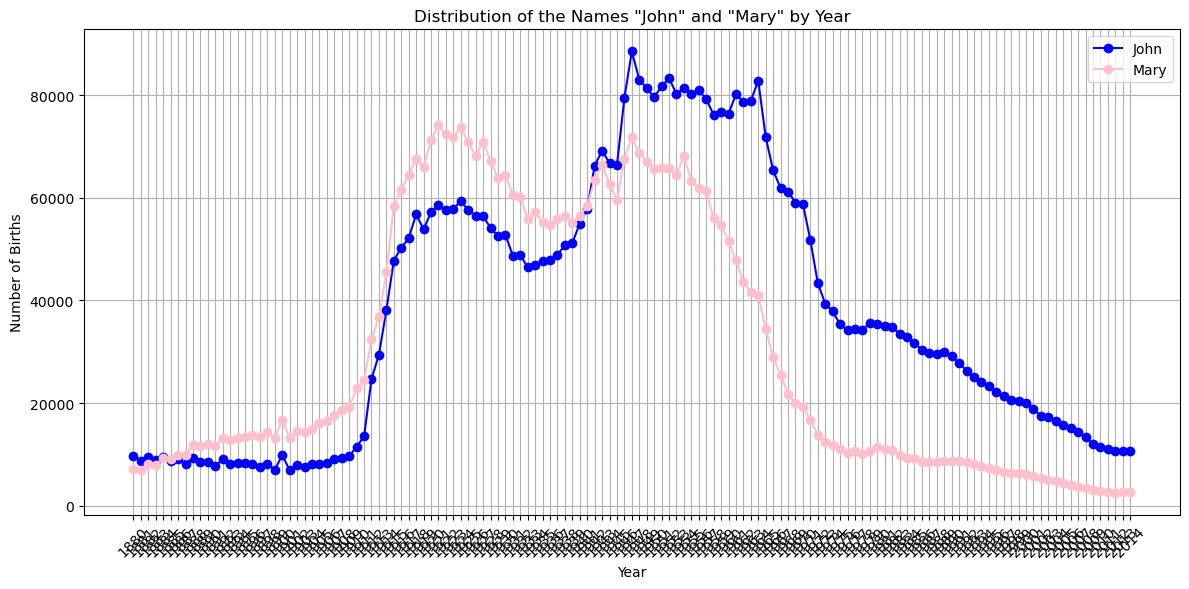

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('NationalNames.csv')

# Filter for names 'John' and 'Mary'
filtered_df = df[df['Name'].isin(['John', 'Mary'])]

# Group by 'Year' and 'Name' and sum the counts
name_distribution = filtered_df.groupby(['Year', 'Name'])['Count'].sum().unstack()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(name_distribution.index, name_distribution['John'], label='John', color='blue', marker='o')
plt.plot(name_distribution.index, name_distribution['Mary'], label='Mary', color='pink', marker='o')

# Adding labels and title
plt.title('Distribution of the Names "John" and "Mary" by Year')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend()
plt.grid()

# Show the plot
plt.xticks(name_distribution.index, rotation=45)  # Rotate year labels for better visibility
plt.tight_layout()  # Adjust layout to make room for the rotated labels
plt.show()

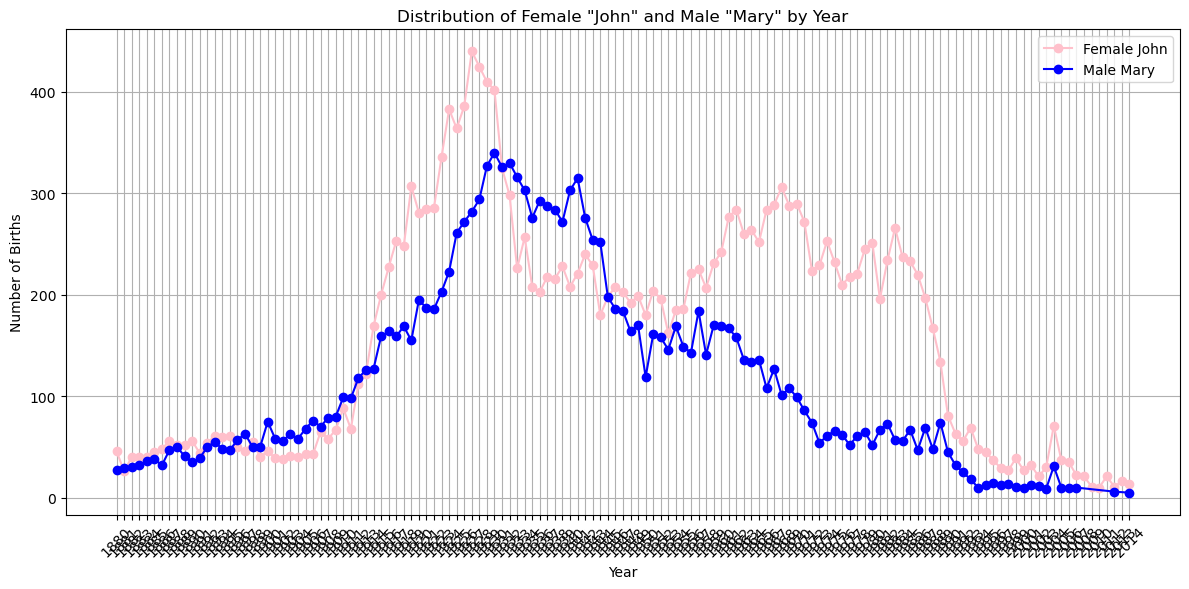

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('NationalNames.csv')

# Filter for female "John" and male "Mary"
# Since "John" is generally a male name, we'll assume female "John" might have been recorded
# Adjust if necessary based on your dataset's structure
female_john = df[(df['Name'] == 'John') & (df['Gender'] == 'F')]
male_mary = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')]

# Group by 'Year' and sum the counts
female_john_distribution = female_john.groupby('Year')['Count'].sum()
male_mary_distribution = male_mary.groupby('Year')['Count'].sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(female_john_distribution.index, female_john_distribution, label='Female John', color='pink', marker='o')
plt.plot(male_mary_distribution.index, male_mary_distribution, label='Male Mary', color='blue', marker='o')

# Adding labels and title
plt.title('Distribution of Female "John" and Male "Mary" by Year')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend()
plt.grid()

# Show the plot
plt.xticks(female_john_distribution.index, rotation=45)  # Rotate year labels for better visibility
plt.tight_layout()  # Adjust layout to make room for the rotated labels
plt.show()

In [41]:
import pandas as pd

# Load the dataset
df = pd.read_csv('NationalNames.csv')

# Group by 'Year' and get the name with the maximum count for each year
most_popular_names = df.loc[df.groupby('Year')['Count'].idxmax()]

# Select relevant columns to display
most_popular_names = most_popular_names[['Year', 'Name', 'Count']]

# Print the results
print(most_popular_names)

         Year      Name  Count
942      1880      John   9655
2938     1881      John   8769
4963     1882      John   9557
7116     1883      John   8894
9318     1884      John   9388
...       ...       ...    ...
1657592  2010  Isabella  22883
1691633  2011    Sophia  21816
1725502  2012    Sophia  22267
1759186  2013    Sophia  21147
1792389  2014      Emma  20799

[135 rows x 3 columns]
